In [24]:
## Deep learning
## Fractal 3 - Assignment 1
## Subhajit Saha - M21AIE261

In [25]:
## Q1 - Implement AE with three layers of encoders and decoders each (from scratch on your own) on MNIST database and compare with inbuilt function.


In [26]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [31]:
## Get MNIST handwritten digit data
(X_train, _), (X_test, _) = mnist.load_data()

In [32]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


In [33]:
## Preprocess the data
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 784))
    return X

X_train  =  pre_process(X_train)
X_test  =  pre_process(X_test)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


In [34]:
## Visualize the digits
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

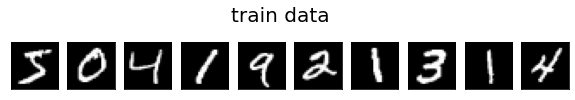

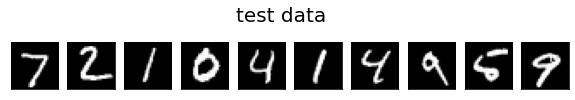

In [35]:
show_data(X_train, title="train data")
show_data(X_test, title="test data")

In [36]:
### Build the digit Autoencoder on MNIST Dataset


In [37]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [38]:
# encoder
input_layer = Input(shape=(input_dim,), name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name="HIDDEN_1")(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name="HIDDEN_2")(code_layer)
output_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [39]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='binary_crossentropy')
AE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 784)]             0         
                                                                 
 HIDDEN_1 (Dense)            (None, 256)               200960    
                                                                 
 CODE (Dense)                (None, 100)               25700     
                                                                 
 HIDDEN_2 (Dense)            (None, 256)               25856     
                                                                 
 OUTPUT (Dense)              (None, 784)               201488    
                                                                 
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [40]:
## Train the digit Autoencoder

AE.fit(X_train, X_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1112
Epoch 2/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0801
Epoch 3/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0757
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0735
Epoch 5/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0722
Epoch 6/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0712
Epoch 7/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0706
Epoch 8/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0700
Epoch 9/100
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0696
Epoch 10/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0693
Epoch 11/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0691
Epoch 12/100
1875/1875 [==============================] - 14s

In [41]:
## Get the decoded (reconstructed) data
decoded_data = AE.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [42]:
## Making a model to get the encoded representation (i.e. intermediate layer output) for a given input.
get_encoded_data = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

In [43]:
## Get the encoded data
encoded_data = get_encoded_data.predict(X_test)

313/313 [==============================] - 1s 2ms/step


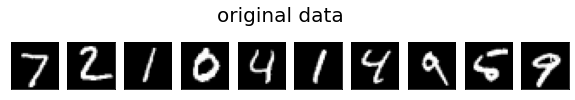

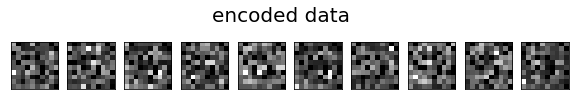

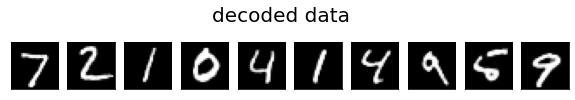

In [44]:
## Visualize the results on test set
show_data(X_test, title="original data")
show_data(encoded_data, height=10, width=10, title="encoded data")
show_data(decoded_data, title="decoded data")